In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def leg_len(data, t, leg, pos):
    '''pos = 0,1,2,3  t = 0 , leg = left:0, 5, 10,  right:19, 24, 29'''
    ex_point = data[t,leg+pos,:]
    next_point = data[t,leg+pos+1,:]
    nxt_v = next_point - ex_point
    return np.linalg.norm(nxt_v), nxt_v
def intersection_angle(a,b):
    return np.arccos(a@b/np.linalg.norm(a)/np.linalg.norm(b))
def rotaMatr(v1,v2):
    u = np.cross(v1,v2)
    u = u/np.linalg.norm(u)
    th = intersection_angle(v1,v2)
    r = np.zeros((3,3))
    c = np.cos(th)
    s = np.sin(th)
    ux = u[0]
    uy = u[1]
    uz = u[2]
    r[0,0] = c + ux**2*(1-c)
    r[0,1] = ux*uy*(1-c) - uz*s
    r[0,2] = ux*uz*(1-c) + uy*s
    
    r[1,0] = ux*uy*(1-c) + uz*s
    r[1,1] = c + uy**2*(1-c)
    r[1,2] = uy*uz*(1-c) - ux*s
    
    r[2,0] = uz*ux*(1-c) - uy*s
    r[2,1] = uz*uy*(1-c) + ux*s
    r[2,2] = c + uz**2*(1-c)
    return r
def ag2(angle):
    return angle/np.pi*180
def set_coord():
    v_ref = np.array([0,0,1])
    v1 = data[0,0,:] - data[0,19,:]
    v2 = data[0,5,:] - data[0,24,:]
    v3 = data[0,10,:] - data[0,29,:]
    v4 = data[0,15,:] - data[0,34,:]
    xx = v1+v2+v3+v4
    x_ref = xx/np.linalg.norm(xx)
    x_ref[1] = 0
    print('x-axis angel: ',ag2(intersection_angle(v_ref,x_ref)))
    return x_ref

coord_x = set_coord()
R_std = rotaMatr(coord_x,np.array([0,0,1]))
std_data = np.zeros(data.shape)
for i in range(899):
    std_data[i,:,:] = (R_std @ (data[i,:].T)).T
tt = 899
length = np.zeros((tt,24))
vec_r = np.zeros((tt,24,3))
for t in range(0,tt):
    i = 0
    for leg in [0,5,10,19,24,29]:
        for pos in range(4):
            length[t,i+pos],vec_r[t,i+pos] = leg_len(std_data,t,leg,pos)
        i += 4

t = 0
print('length of six legs of four parts are: ')
legname = ['left front', 'left middle', 'left hind', 'right front', 'right middle', 'right hind']
for i in range(6):
    print(legname[i])
    print([length[t,i*4+j] for j in range(4)])

x-axis angel:  38.99554730142681
length of six legs of four parts are: 
left front
[0.41403956899220884, 0.6834313211354136, 0.5965678647359476, 0.7008085946938518]
left middle
[0.31111482309465965, 0.8950070660764843, 0.826068999365789, 0.8899131593030335]
left hind
[0.3022583021135212, 0.9196839265108279, 0.9020544408440511, 0.8807835090340419]
right front
[0.4313949865614196, 0.7338953002532272, 0.5835228119934599, 0.6876515206709798]
right middle
[0.3120475759381852, 0.9702279278407753, 0.8055189412119721, 0.8998878948957555]
right hind
[0.30356705462083644, 0.9452870186086476, 0.826829770413402, 0.9966675196551373]


In [3]:
print('The vector of 6 x 4 leg parts is: ')
for i in range(6):
    print('\n',legname[i])
    [print(vec_r[t,i*4+j]) for j in range(4)]

The vector of 6 x 4 leg parts is: 

 left front
[-0.1820372   0.36907277 -0.04556882]
[ 0.51609911 -0.04601348  0.44564879]
[0.05648198 0.57712258 0.14011615]
[0.21724683 0.53631526 0.39535103]

 left middle
[-0.01057169  0.30864    -0.03770972]
[-0.23672611 -0.3949341   0.76747994]
[-0.01310369  0.81545143  0.13136685]
[-0.14850558  0.61726808  0.62359573]

 left hind
[-0.06770519  0.29434474 -0.01171601]
[-0.60748213 -0.37778376  0.57798219]
[-0.39280363  0.80010335 -0.13871612]
[-0.6194281   0.61203034  0.1323151 ]

 right front
[-0.21275882  0.33314128  0.17277792]
[ 0.54593803 -0.25175732 -0.42091833]
[-0.10647742  0.55342464  0.15126996]
[ 0.1305276   0.65000409 -0.1825427 ]

 right middle
[-0.01746999  0.30851107  0.04346732]
[-0.18322879 -0.42867379 -0.85088673]
[ 0.15349425  0.7904746  -0.02121764]
[ 0.00932014  0.67010295 -0.6005609 ]

 right hind
[-0.06701464  0.29400813  0.03494591]
[-0.40011962 -0.58257623 -0.62775534]
[-0.17216764  0.80475315  0.07986324]
[-0.50358769  0.

In [4]:
print('The coordinate of 30 points are: ')
t = 0
for i in range(6):
    print('\n',legname[i])
    if(i>2): i = i + 4/5
    [print(std_data[t,int(i*5+j)]) for j in range(5)]

The coordinate of 30 points are: 

 left front
[ 2.27273804 -1.88360318  0.43356338]
[ 2.09070084 -1.51453041  0.38799455]
[ 2.60679995 -1.56054389  0.83364334]
[ 2.66328193 -0.98342132  0.97375949]
[ 2.88052876 -0.44710605  1.36911052]

 left middle
[ 1.78442367 -1.77787974  0.19873547]
[ 1.77385198 -1.46923974  0.16102575]
[ 1.53712587 -1.86417384  0.92850569]
[ 1.52402219 -1.04872241  1.05987254]
[ 1.37551661 -0.43145433  1.68346827]

 left hind
[ 1.58355454 -1.73262418  0.15236787]
[ 1.51584936 -1.43827944  0.14065185]
[ 0.90836722 -1.8160632   0.71863405]
[ 0.5155636  -1.01595985  0.57991792]
[-0.1038645  -0.40392951  0.71223302]

 right front
[ 2.26088399 -1.94177511 -0.65337624]
[ 2.04812517 -1.60863384 -0.48059832]
[ 2.5940632  -1.86039115 -0.90151665]
[ 2.48758578 -1.30696652 -0.75024669]
[ 2.61811338 -0.65696242 -0.93278939]

 right middle
[ 1.80490275 -1.8597792  -0.43832053]
[ 1.78743276 -1.55126813 -0.39485321]
[ 1.60420396 -1.97994192 -1.24573993]
[ 1.75769822 -1.18946732

In [5]:
np.save('length.npy',length)

In [15]:
length[:,0].shape
t = np.linspace(0,9,899)

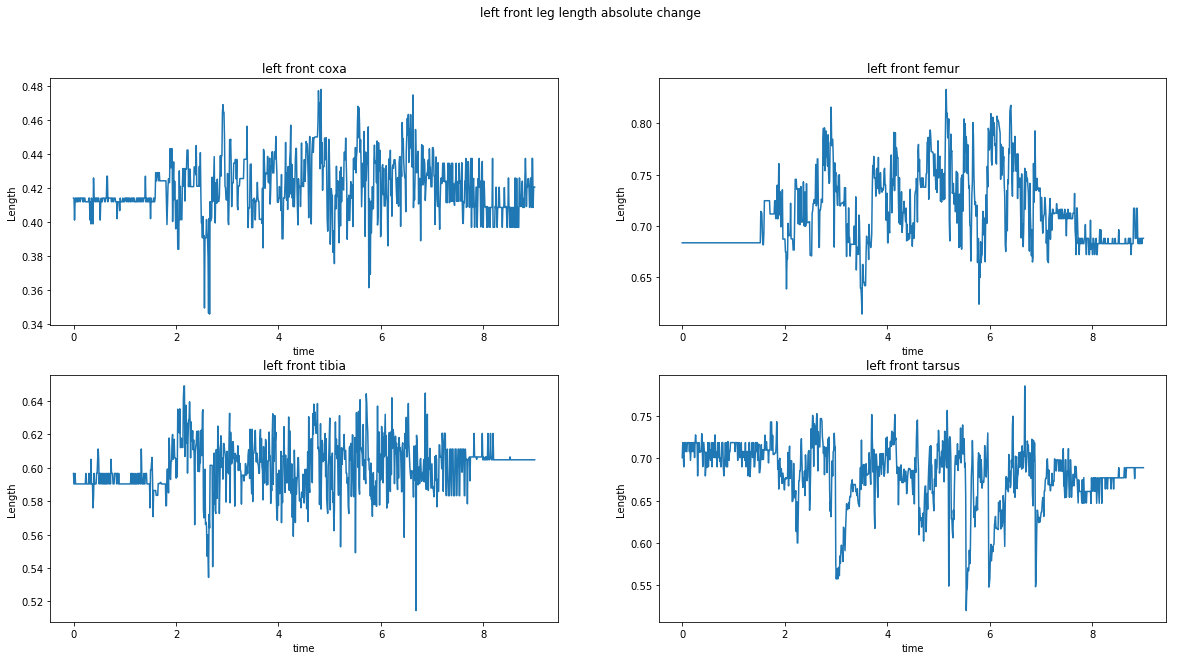

In [50]:
parts = ['coxa', 'femur', 'tibia', 'tarsus']
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg length absolute change'%legname[0])
for i,ax in enumerate(axs):
    lens = length[:,i]
    ax.plot(t,lens)
    ax.set_title('%s %s'%(legname[0], parts[i]))
    ax.set_ylabel('Length')
    ax.set_xlabel('time')

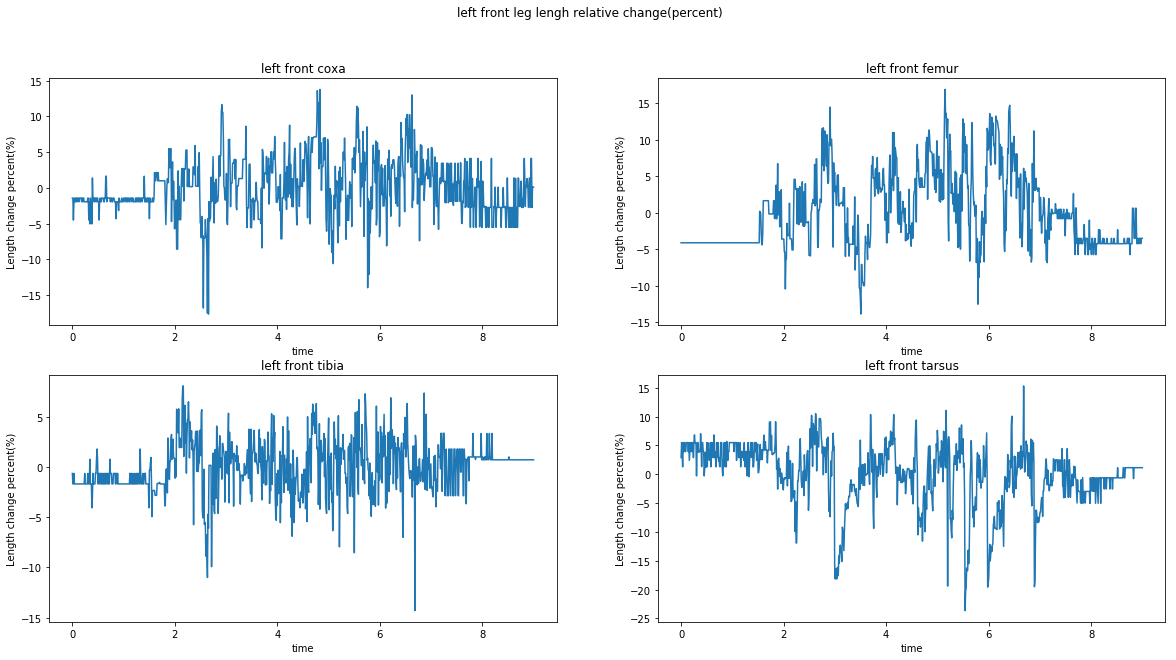

In [54]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg lengh relative change(percent)'%legname[0])
for i,ax in enumerate(axs):
    lens = length[:,i]
    ax.plot(t,(lens-lens.mean())/lens.mean()*100)
    ax.set_title('%s %s'%(legname[0], parts[i]))
    ax.set_ylabel('Length change percent(%)')
    ax.set_xlabel('time')

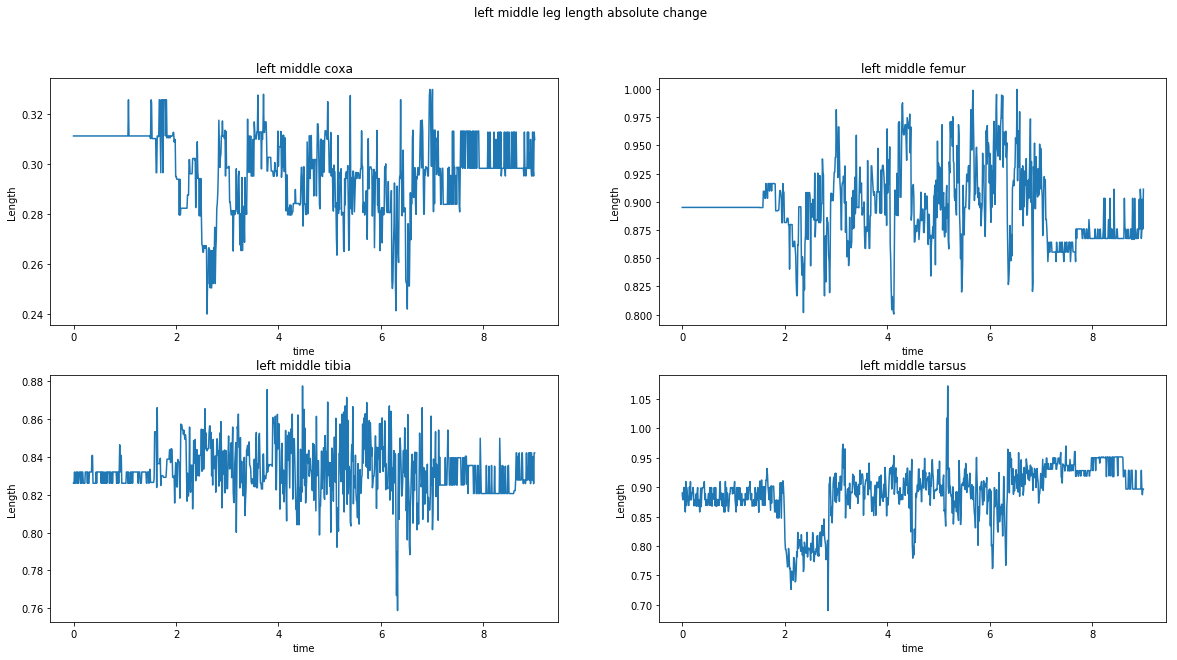

In [52]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg length absolute change'%legname[1])
for i,ax in enumerate(axs):
    lens = length[:,i+4]
    ax.plot(t,lens)
    ax.set_title('%s %s'%(legname[1], parts[i]))
    ax.set_ylabel('Length')
    ax.set_xlabel('time')

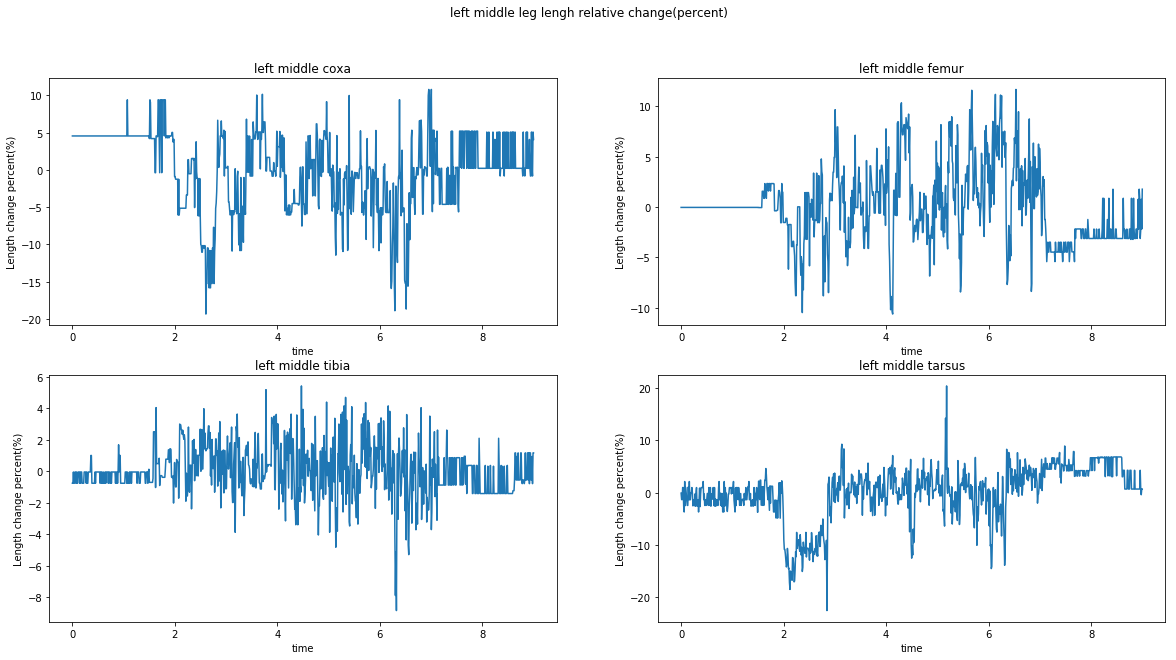

In [55]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg lengh relative change(percent)'%legname[1])
for i,ax in enumerate(axs):
    lens = length[:,i+4]
    ax.plot(t,(lens-lens.mean())/lens.mean()*100)
    ax.set_title('%s %s'%(legname[1], parts[i]))
    ax.set_ylabel('Length change percent(%)')
    ax.set_xlabel('time')

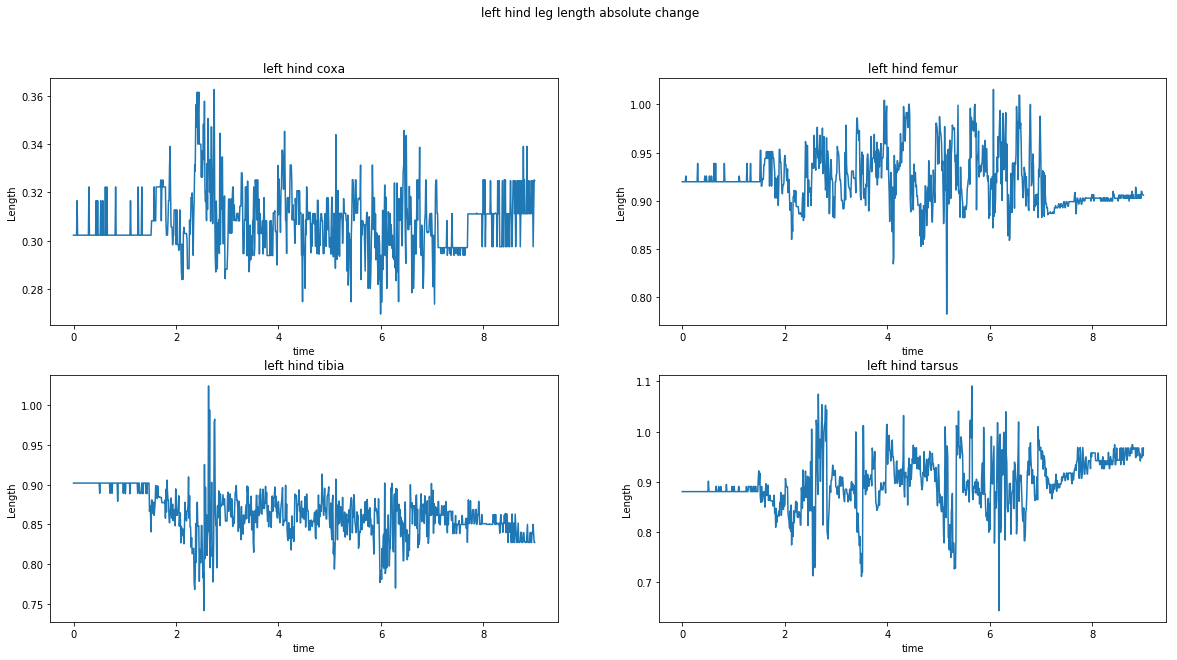

In [61]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg length absolute change'%legname[2])
for i,ax in enumerate(axs):
    lens = length[:,i+8]
    ax.plot(t,lens)
    ax.set_title('%s %s'%(legname[2], parts[i]))
    ax.set_ylabel('Length')
    ax.set_xlabel('time')

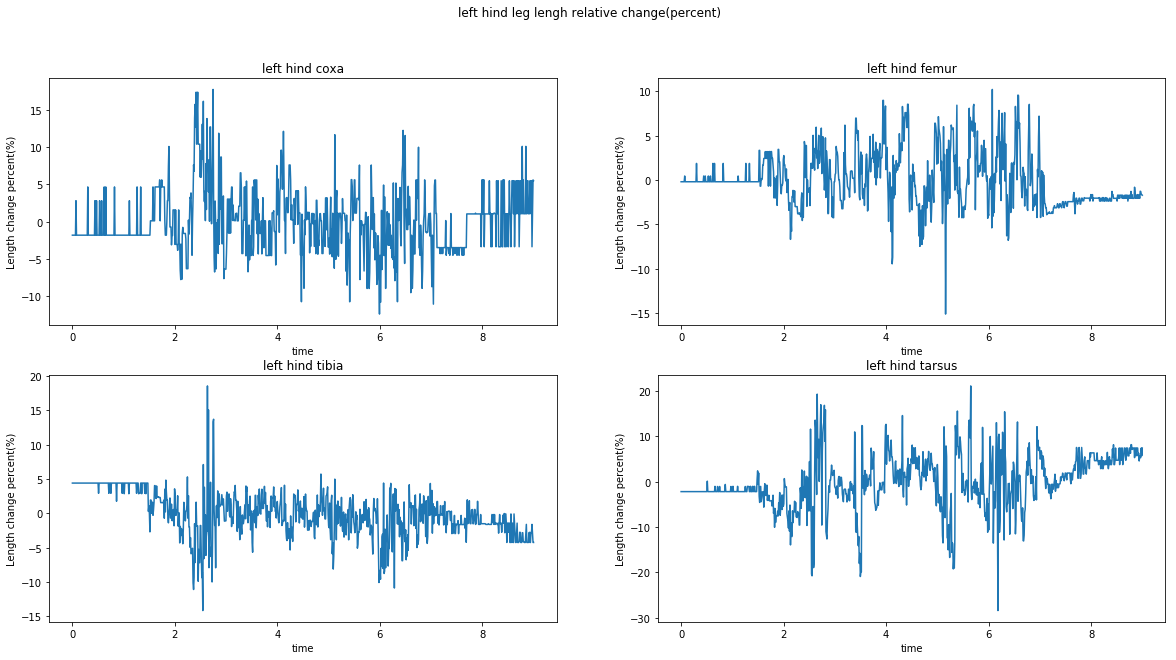

In [60]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg lengh relative change(percent)'%legname[2])
for i,ax in enumerate(axs):
    lens = length[:,i+8]
    ax.plot(t,(lens-lens.mean())/lens.mean()*100)
    ax.set_title('%s %s'%(legname[2], parts[i]))
    ax.set_ylabel('Length change percent(%)')
    ax.set_xlabel('time')

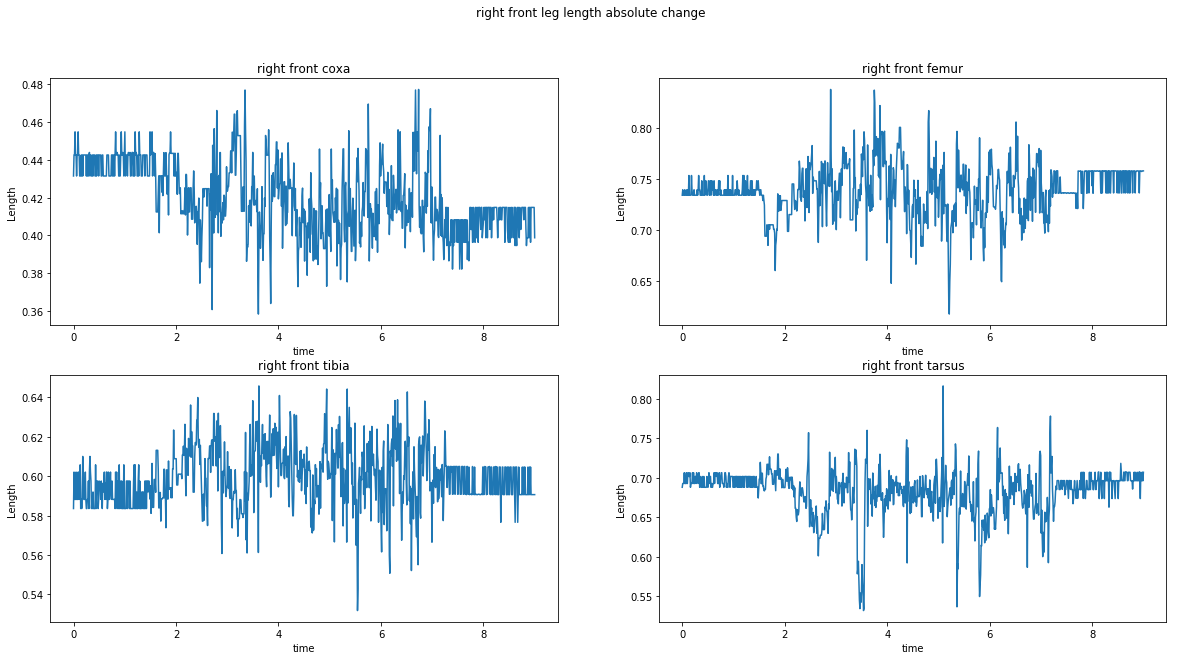

In [59]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg length absolute change'%legname[3])
for i,ax in enumerate(axs):
    lens = length[:,i+12]
    ax.plot(t,lens)
    ax.set_title('%s %s'%(legname[3], parts[i]))
    ax.set_ylabel('Length')
    ax.set_xlabel('time')

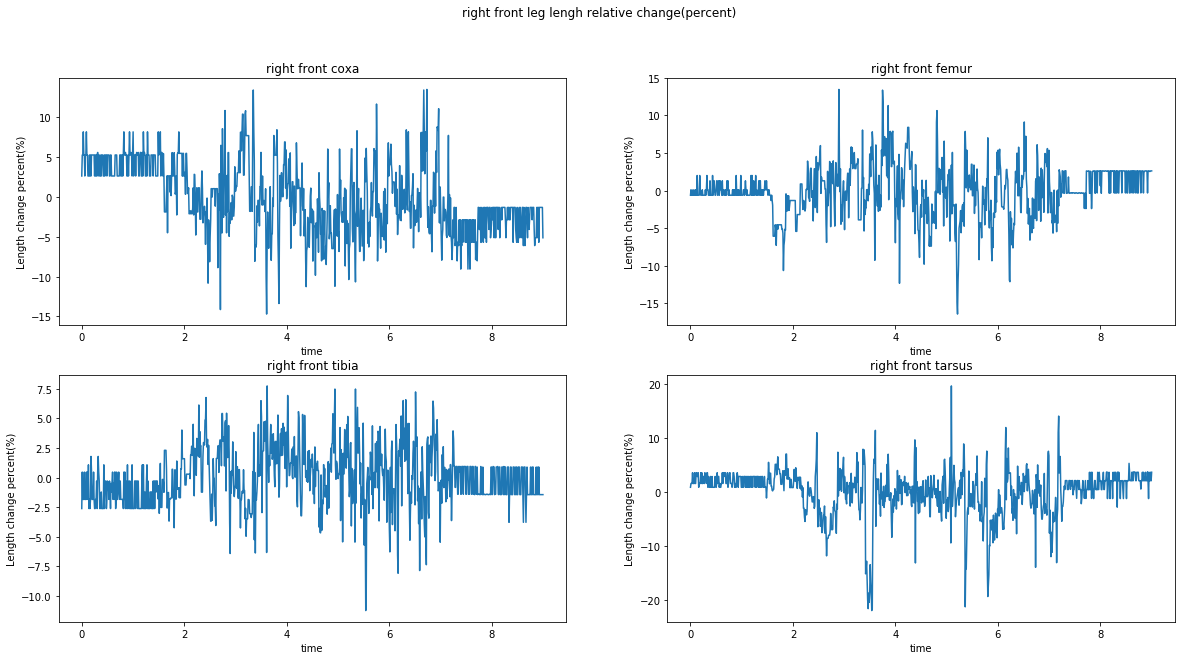

In [62]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg lengh relative change(percent)'%legname[3])
for i,ax in enumerate(axs):
    lens = length[:,i+12]
    ax.plot(t,(lens-lens.mean())/lens.mean()*100)
    ax.set_title('%s %s'%(legname[3], parts[i]))
    ax.set_ylabel('Length change percent(%)')
    ax.set_xlabel('time')

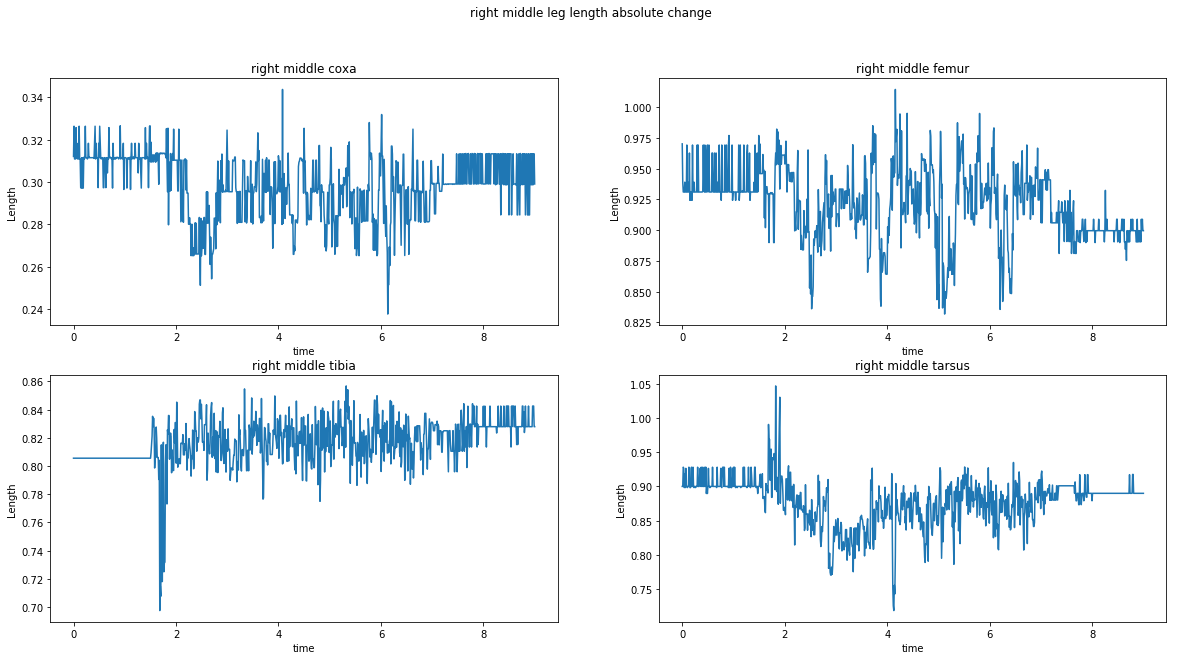

In [63]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg length absolute change'%legname[4])
for i,ax in enumerate(axs):
    lens = length[:,i+16]
    ax.plot(t,lens)
    ax.set_title('%s %s'%(legname[4], parts[i]))
    ax.set_ylabel('Length')
    ax.set_xlabel('time')

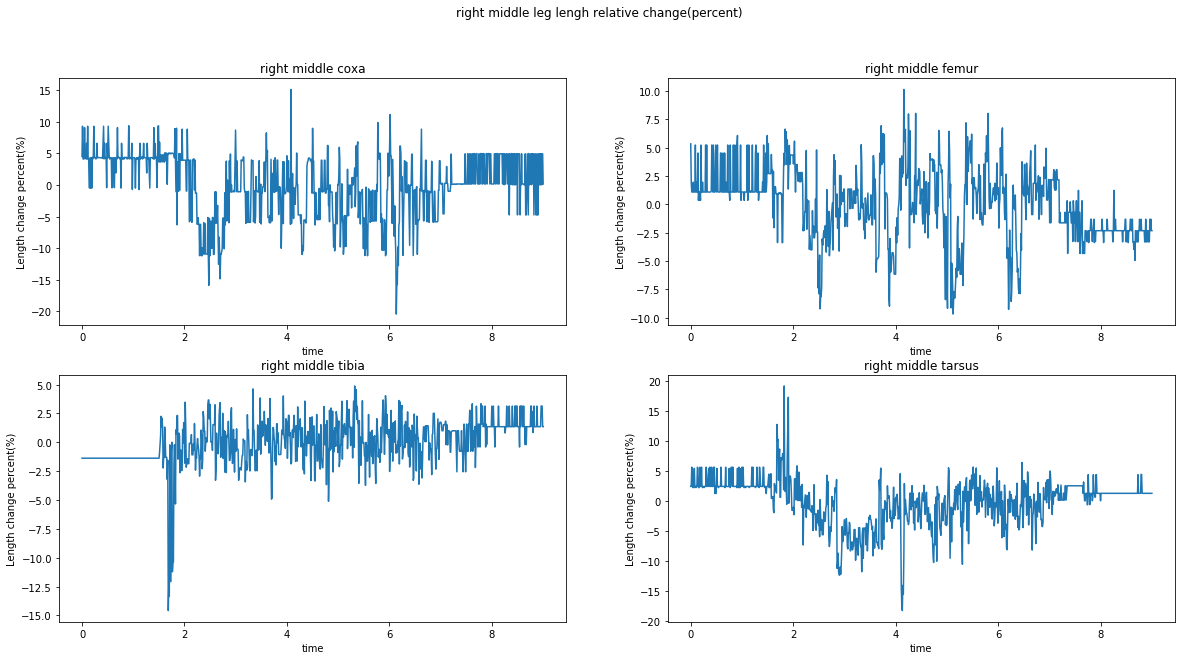

In [64]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg lengh relative change(percent)'%legname[4])
for i,ax in enumerate(axs):
    lens = length[:,i+16]
    ax.plot(t,(lens-lens.mean())/lens.mean()*100)
    ax.set_title('%s %s'%(legname[4], parts[i]))
    ax.set_ylabel('Length change percent(%)')
    ax.set_xlabel('time')

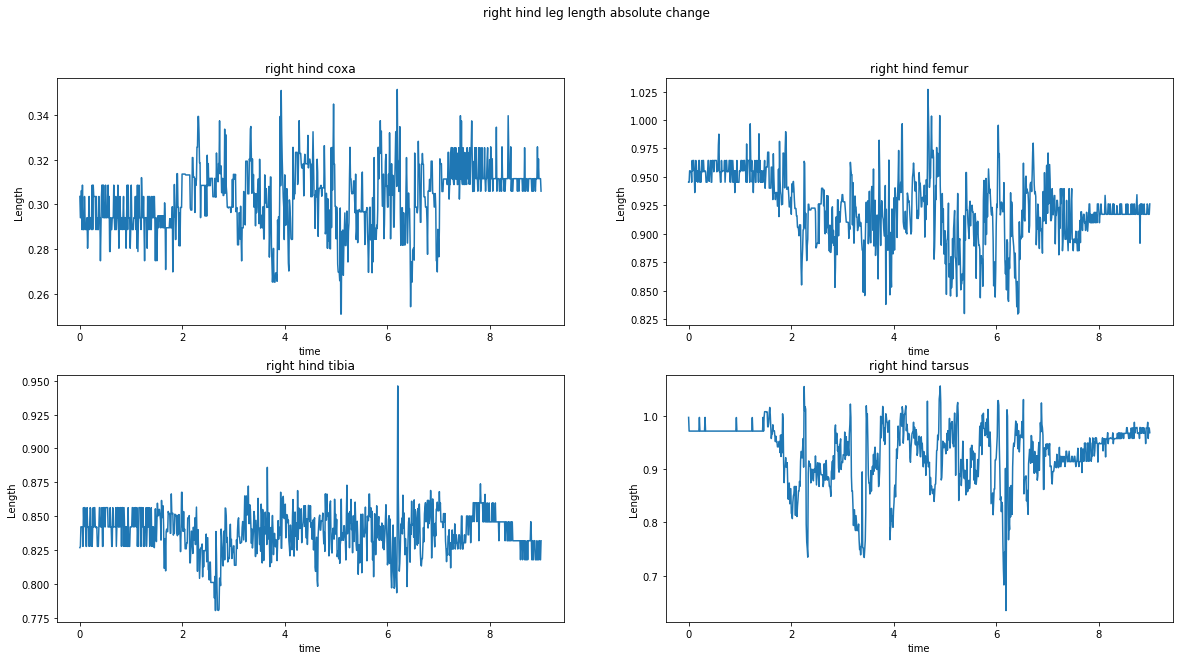

In [65]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg length absolute change'%legname[5])
for i,ax in enumerate(axs):
    lens = length[:,i+20]
    ax.plot(t,lens)
    ax.set_title('%s %s'%(legname[5], parts[i]))
    ax.set_ylabel('Length')
    ax.set_xlabel('time')

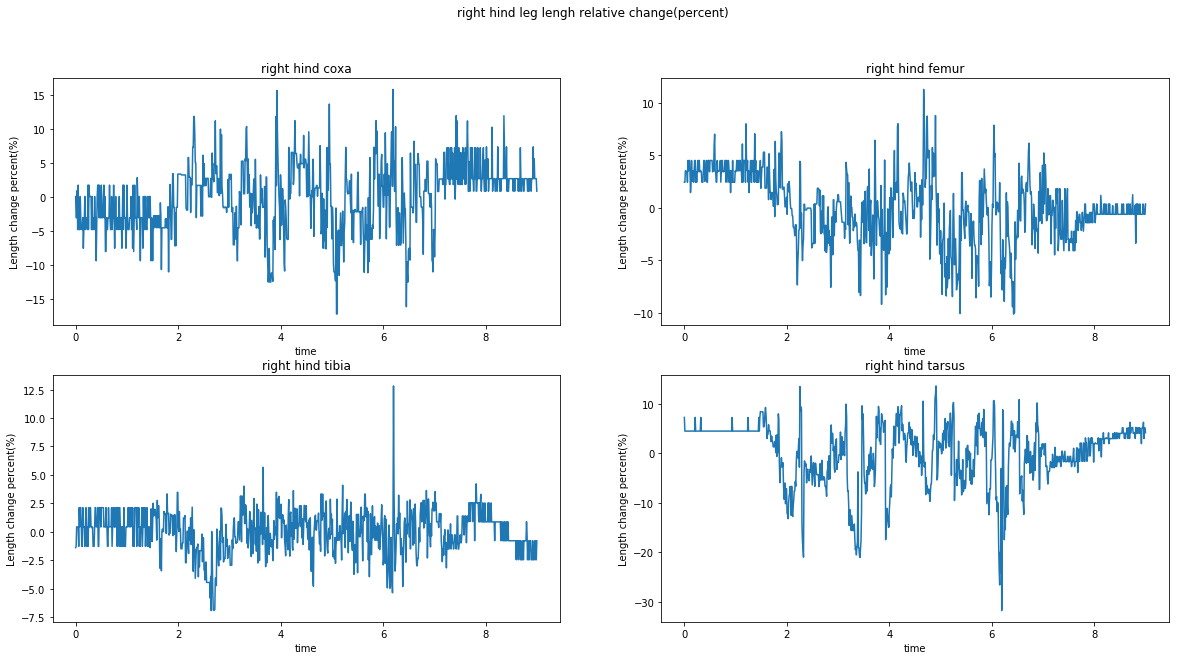

In [66]:
fig, axs = plt.subplots(2,2,figsize = (20,10))
axs = axs.reshape(4)
fig.suptitle('%s leg lengh relative change(percent)'%legname[5])
for i,ax in enumerate(axs):
    lens = length[:,i+20]
    ax.plot(t,(lens-lens.mean())/lens.mean()*100)
    ax.set_title('%s %s'%(legname[5], parts[i]))
    ax.set_ylabel('Length change percent(%)')
    ax.set_xlabel('time')

In [72]:
'''body-coxa position inferred from CT-scan'''
body_coxa = np.array([[-0.88950,-0.77869,-1.71708], [-0.75701,-0.90887,0.58569],[-0.47809,-0.50494,1.28127],    # left
                      [  0.8859,-0.77502,-1.70955], [ 0.75058,-0.90576,0.5868], [0.47586,-0.5,1.2777]])         # right
body_coxa

In [75]:
length.shape

(899, 24)

In [ ]:
'''24 leg parts length inferred from CT-scan  (the length of tarsus is meaningless)''' 
'''  left front  +  left middle  + right hind '''
length_ct = np.array([[1.89088, 3.23936, 2.08078, 4.4],[1.14195, 3.91499, 3.15936, 4.4], [1.36256, 3.80671, 3.5816, 5]])

In [ ]:
length_ct